In [1]:
import numpy as np
from Zebrafish_model import *
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
plt.style.use('seaborn-whitegrid')

<h1>Model visualization</h1>

{'k_a': 0.76, 'k_PG,f': 0.00327, 'k_PS,f': 0.422, 'k_P,e': 0.0185, 'k_G,e': 0.00743, 'k_S,e': 0.000664}


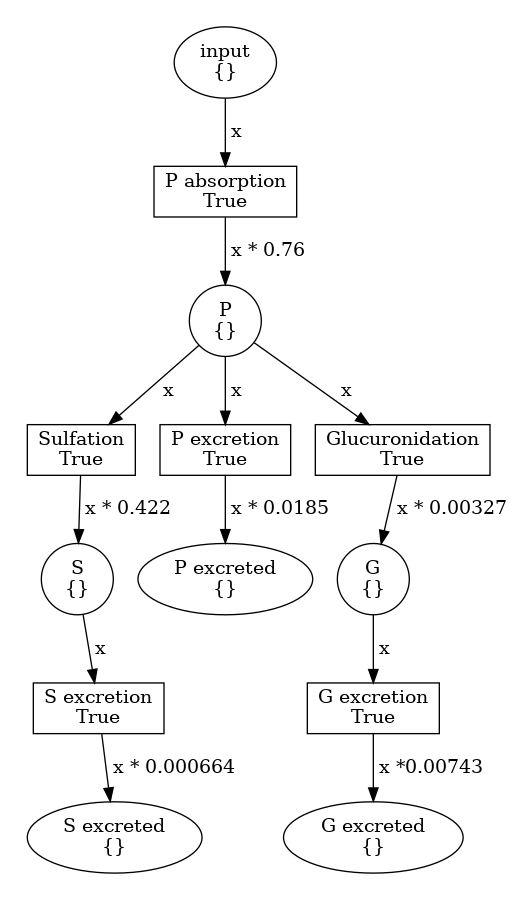

In [2]:
model = ZebraMol()
model.save_img()
Image.open('zebrafish_model.png')

<h1>Data preprocessing</h1>

In [3]:
# read dataset
df = pd.read_csv('data/dataset.csv')

# DV preprocessing
df['DV'] = df['DV'].replace(".", None)
df['DV'] = df['DV'].astype(float)
df['AMT'] = df['AMT'].replace(".", None)
df['AMT'] = df['AMT'].astype(float)

# print statistics and head
df.head(3)

,ID,TIME,AMT,DV,EVID,MDV,CMT,XEXP,BQL,XEXP2,AGE,BLOOD
0,195,0.0,1.0,NaN,1,1,1,24.0,0,1,5,0
1,195,59.9,NaN,NaN,2,1,-1,24.0,0,1,5,0
2,195,59.9,NaN,0.0,2,1,1,24.0,0,1,5,0


# Loading resutls

In [4]:
# Experiment 1
p1 = np.load('results/exp1/p_val.npy')
s1 = np.load('results/exp1/s_val.npy')
g1 = np.load('results/exp1/g_val.npy')
pe1 = np.load('results/exp1/pe_val.npy')
se1 = np.load('results/exp1/se_val.npy')
ge1 = np.load('results/exp1/ge_val.npy')
# Expreriment 2
p2 = np.load('results/exp2/p_val.npy')
s2 = np.load('results/exp2/s_val.npy')
g2 = np.load('results/exp2/g_val.npy')
pe2 = np.load('results/exp2/pe_val.npy')
se2 = np.load('results/exp2/se_val.npy')
ge2 = np.load('results/exp2/ge_val.npy')

# Plotting function

In [5]:
def plots(p1, g1, s1, title, subtitles, linestyle, labels, p2=[], s2=[], g2=[], data_points=0, log_scale=True):
  fig, axis = plt.subplots(1,3, figsize=(20,6))
  fig.tight_layout(pad=5.0)
  # fig.suptitle(title, fontsize=24, fontweight='bold')

  # Paracetamol
  
  # Data things
  if data_points==1:
    temp_df = df[(df['CMT'] == 2) & 
              (df['BQL'] == 0) &
              (df['MDV'] == 0) & 
              (df['EVID'] == 0) &
              (df['DV'] is not None ) &
              (df['BLOOD'] == 0)]
    axis[0].scatter(x=temp_df['TIME'][df['XEXP2'] == 0],y=temp_df['DV'][df['XEXP2'] == 0], c='#0000ff', label="data exp 1")
    axis[0].scatter(x=temp_df['TIME'][df['XEXP2'] == 1],y=temp_df['DV'][df['XEXP2'] == 1], marker="2", linewidths=8, c='#6e96ff', label="data exp 2")

  if data_points==2:
    temp_df = df[(df['CMT'] == 5) & 
              (df['BQL'] == 0) &
              (df['MDV'] == 0) & 
              (df['EVID'] == 0) &
              (df['DV'] is not None ) &
              (df['BLOOD'] == 0)]
    axis[0].scatter(x=temp_df['TIME'],y=temp_df['DV'], c='#0000ff')

  axis[0].set_title(subtitles[0], size=22)
  axis[0].plot(p1, color='#0000ff', linewidth=4, linestyle=linestyle, label='Experiment 1')
  if len(p2) != 0:
    axis[0].plot(p2, '--', color='#6e96ff', linewidth=4, label='Experiment 2')
  axis[0].set_xlabel(labels[0][0],  fontsize=18)
  axis[0].set_ylabel(labels[0][1],  fontsize=18)
  if log_scale:
    axis[0].set_yscale("log", base=10)
  axis[0].set_xscale("linear")
  axis[0].legend(prop={'size': 10})

  # Paracetamol-glucuronide
  if data_points==1:
    temp_df = df[(df['CMT'] == 3) & 
              (df['BQL'] == 0) &
              (df['MDV'] == 0) & 
              (df['EVID'] == 0) &
              (df['DV'] is not None ) &
              (df['BLOOD'] == 0)]
    axis[1].scatter(x=temp_df['TIME'][df['XEXP2'] == 0],y=temp_df['DV'][df['XEXP2'] == 0], c='#ff00ff', label="data exp 1")
    axis[1].scatter(x=temp_df['TIME'][df['XEXP2'] == 1],y=temp_df['DV'][df['XEXP2'] == 1], marker="2", linewidths=8, c='#f985f9', label="data exp 2")
  
  if data_points==2:
    temp_df = df[(df['CMT'] == 6) & 
              (df['BQL'] == 0) &
              (df['MDV'] == 0) & 
              (df['EVID'] == 0) &
              (df['DV'] is not None ) &
              (df['BLOOD'] == 0)]
    axis[1].scatter(x=temp_df['TIME'],y=temp_df['DV'], c='#ff00ff')

  axis[1].set_title(subtitles[1], size=22)
  axis[1].plot(g1, color='#ff00ff', linewidth=4,  linestyle=linestyle, label='Experiment 1')
  if len(g2) != 0:
    axis[1].plot(g2, '--', color='#f985f9', linewidth=4, label='Experiment 2')
  axis[1].set_xlabel(labels[1][0], fontsize=18)
  axis[1].set_ylabel(labels[1][1], fontsize=18)
  if log_scale:
    axis[1].set_yscale("log", base=10)
  axis[1].set_xscale("linear")
  axis[1].legend(prop={'size': 10})
  
  # Paracetamol-sulfate
  if data_points==1:
    temp_df = df[(df['CMT'] == 4) & 
              (df['BQL'] == 0) &
              (df['MDV'] == 0) & 
              (df['EVID'] == 0) &
              (df['DV'] is not None ) &
              (df['BLOOD'] == 0)]
    axis[2].scatter(x=temp_df['TIME'][df['XEXP2'] == 0],y=temp_df['DV'][df['XEXP2'] == 0], c='#ff5700', label="data exp 1")
    axis[2].scatter(x=temp_df['TIME'][df['XEXP2'] == 1],y=temp_df['DV'][df['XEXP2'] == 1], marker="2", linewidths=8, c='#fc9b68', label="data exp 2")

  if data_points==2:
    temp_df = df[(df['CMT'] == 7) & 
              (df['BQL'] == 0) &
              (df['MDV'] == 0) & 
              (df['EVID'] == 0) &
              (df['DV'] is not None ) &
              (df['BLOOD'] == 0)]
    axis[2].scatter(x=temp_df['TIME'],y=temp_df['DV'], c='#ff5700')

  axis[2].set_title(subtitles[2],size=22)
  axis[2].plot(s1, color='#ff5700', linewidth=4, linestyle=linestyle, label='Experiment 1')
  if len(s2) != 0:
    axis[2].plot(s2, '--', color='#fc9b68', linewidth=4, label='Experiment 2')
  axis[2].set_xlabel(labels[2][0], fontsize=18)
  axis[2].set_ylabel(labels[2][1], size=18)
  if log_scale:
    axis[2].set_yscale("log", base=10)
  axis[2].set_xscale("linear")
  axis[2].legend(prop={'size': 10})
  plt.show()

# Concentration in homogenates

In [6]:
subtitles_exposure = [
  'Paracetamol in homogenate',
  'Paracetamol-glucuronide in homogenate',
  'Paracetamol-sulfate in homogenate'
]
labels_exposure = [
  [
    ('Time (min)'),
    ('Compound (pmoles/larva)')
  ],
  [
    ('Time (min)'),
    ('Compound (pmoles/larva)')
  ],
  [
    ('Time (min)'),
    ('Compound (pmoles/larva)')
  ]
]
title_exposure = 'Internal Exposure'

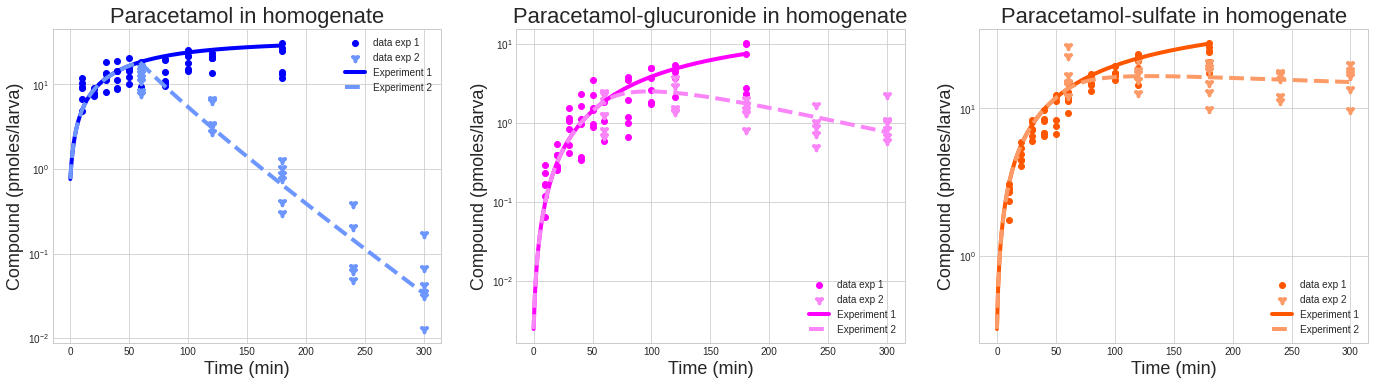

In [7]:
plots(
    p1=p1, 
    p2=p2, 
    s1=s1, 
    s2=s2, 
    g1=g1, 
    g2=g2, 
    title=title_exposure,
    subtitles=subtitles_exposure,
    labels=labels_exposure,
    linestyle='solid',
    data_points=1
  )

# Excretion plots

In [8]:
title_excreted = 'Excreted Compound'
subtitles_excreted = [
  'Paracetamol excreted',
  'Paracetamol-glucuronide excreted',
  'Paracetamol-sulfate excreted'
]
labels_excreted = [
  [
    ('Time (min)'),
    ('Excreted Compound (pmoles/larva)')
  ],
  [
    ('Time (min)'),
    ('Excreted Compound (pmoles/larva)')
  ],
  [
    ('Time (min)'),
    ('Excreted Compound (pmoles/larva)')
  ]
]

<h4>Excretion without recovery fraction</h4>

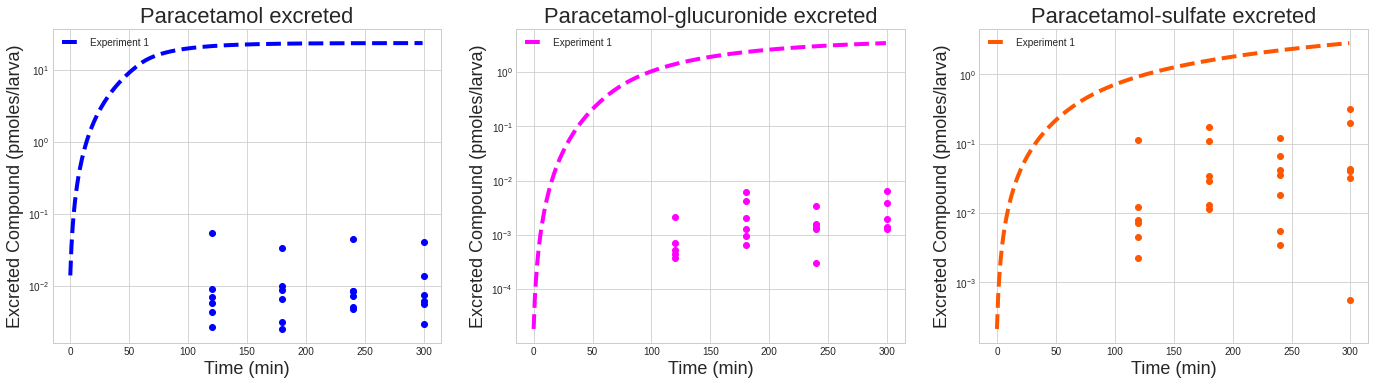

In [9]:
plots(
    p1=pe2, 
    g1=ge2, 
    s1=se2,
    title=title_excreted,
    subtitles=subtitles_excreted,
    labels=labels_excreted,
    linestyle='dashed',
    data_points=2,
    log_scale=True
  )

<h4>Excreted compounds with recovery fraction</h4>

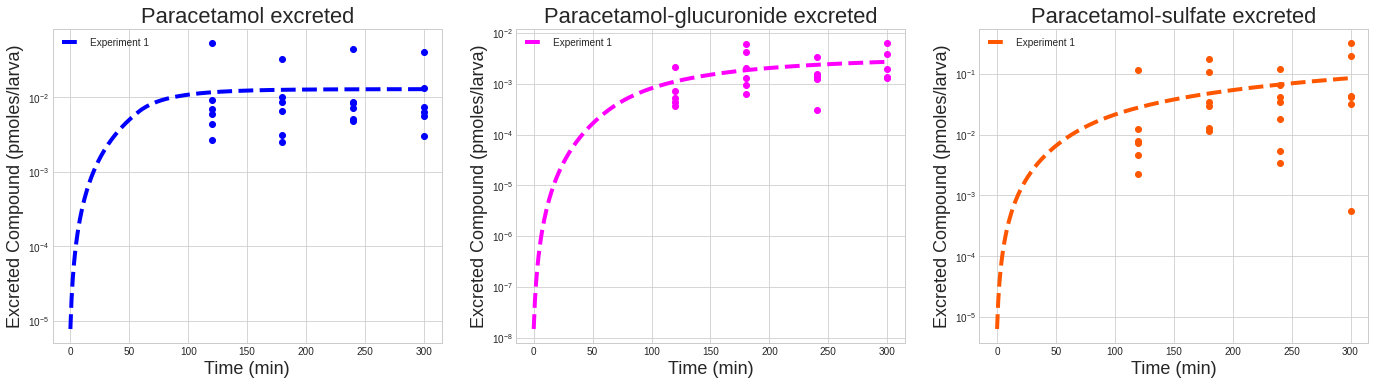

In [10]:
plots(
    p1=pe2*0.00055, 
    g1=ge2*0.0008, 
    s1=se2*0.03,
    title=title_excreted,
    subtitles=subtitles_excreted,
    labels=labels_excreted,
    linestyle='dashed',
    data_points=2,
    log_scale=True
  )

# Clearance

Text(0.5, 54.5, 'Time (min)')

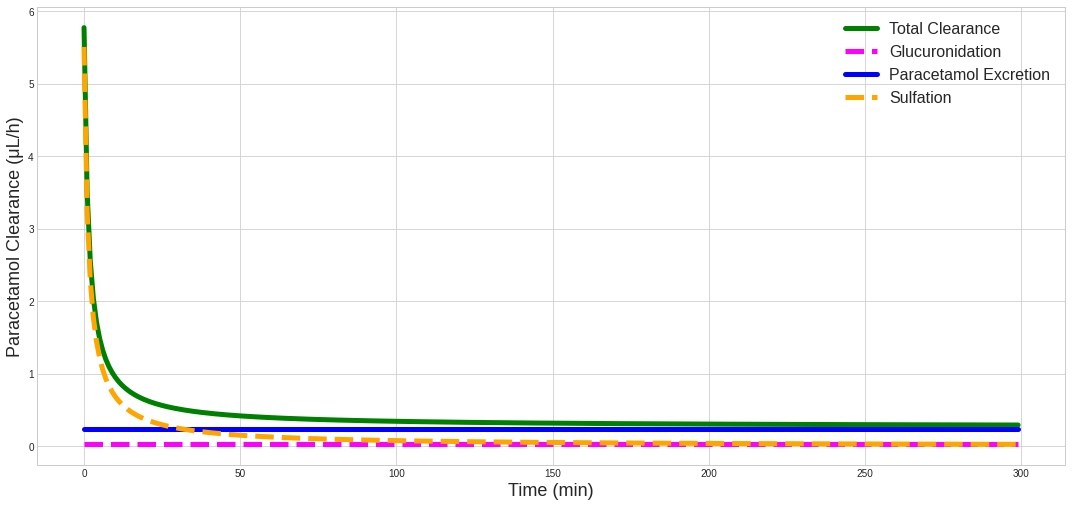

In [11]:
sulfation = []
glucu = []
excre = []
K_pe = 0.0185
K_gf = 0.00327
for t in range(300):
  k_PS_f_0 = 0.422
  t_50 = 1.42
  k_PS_f = k_PS_f_0*(1- (t/(t_50 + t)))
  sulfation.append(k_PS_f*0.262*60)
  excre.append(K_pe*0.218*60)
  glucu.append(K_gf*0.125*60)
sulfation = np.array(sulfation)*0.83
tot = np.array(sulfation) + np.array(glucu) + np.array(excre)
fig, ax = plt.subplots(figsize=(16,8))
fig.tight_layout(pad=5.0)
ax.plot(tot, label='Total Clearance', linewidth=5, color='green')
ax.plot(glucu, label='Glucuronidation', linewidth=5, color='magenta', linestyle='dashed')
ax.plot(excre, label='Paracetamol Excretion', linewidth=5, color='blue')
ax.plot(sulfation, label='Sulfation', linewidth=5, color='orange', linestyle='dashed')
plt.legend(prop={'size': 16})
# fig.suptitle('Paracetamol Clearance over Time', fontsize=24, fontweight='bold')
ax.set_ylabel('Paracetamol Clearance (μL/h)', fontsize=18)
ax.set_xlabel('Time (min)', fontsize=18)